C:\Users\Admin
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int8
0       1

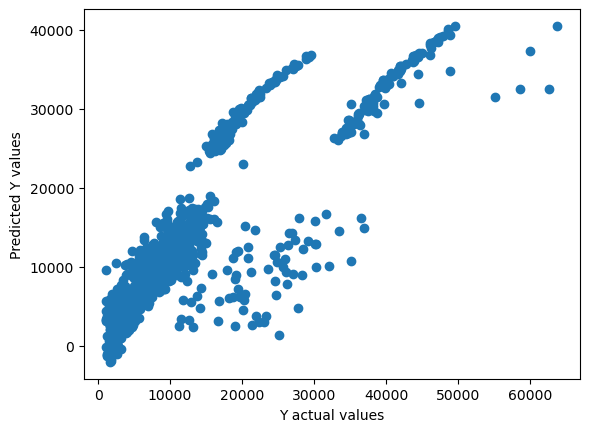

0.7306840408360218
[11051.54909755  9821.28110689 37867.57220923 16125.70579228
  6920.27132517  3879.38549816  1448.91928088 14390.17797974
  9022.95151353  7458.83371884  4584.60125463 10309.9886336
  8693.03891958  4085.25393494 27551.60737718 11151.0640722
 11243.0536825   5962.9521121   8181.9015666  26750.7993431
 33448.59842228 14350.03320383 11672.89478465 32235.7832204
  4326.07702625  9096.53607025  1045.25196369 10177.76672094
  4042.60346751 10384.28681219  9035.98983755 40123.71002379
 15507.20819083 13678.264976   24481.97362849  5059.21988589
 12889.80609711 30333.92625689 33301.25091403  3431.35787088
  3941.81614597  4203.90901434 30219.19050725 39245.56885373
 27762.83744249  4994.74188765 11042.48621304  7760.15047885
  3569.09734756 10613.61535955  5544.95921408  3397.80923785
 32701.67144343 38285.57836702 16290.50463759  6965.99677468
  5895.27536963  9364.94083823  9395.1780384  11722.13868077
  1611.87873326 38750.4981005  15296.11225478 11708.42958487
 14076.39

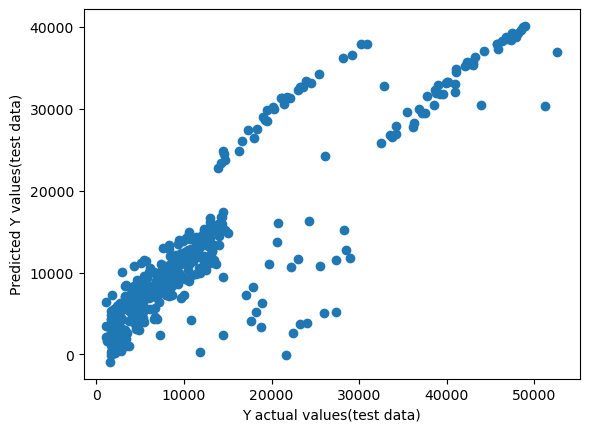

0.7911113876316933

In [79]:
import pandas as pd #library imported to read an imported dataset
import os #imported to check the working directory
from sklearn.model_selection import train_test_split #library to split test and train data
from sklearn.linear_model import LinearRegression #library to use linear regression mode
import matplotlib.pyplot as plt #library to check the plots between real values and predicted values
from sklearn.metrics import r2_score #library to check the r square value to ensure if the model is a good fit
print(os.getcwd()) # printing the working directory
df= pd.read_csv('C:/Users/Admin/Downloads/insurance.csv') #reading the csv file
print(df)
catVar=['sex','smoker','region'] #array created to store the names of categorical values
#for loop run over catVar to convert the respective columns in the df to codes
for var in catVar :
    # print(df[var])
    df[var]=df[var].astype('category') #converting the column into categorical datatype
    df[var]=df[var].cat.codes # converting the values into code values
    print(df[var])

print(df.isnull().sum()) #identifying if there are any null values in each column

#Storing the data by dropping the column of dependent variable
x=df.drop(columns='charges') #dropping charges column and storing the data in indValues
print(indValues)

y= df['charges'] #storing the column values of charges in depValue (dependent variable)
print(depValue)

#splitting the data into training and testing data
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=0)

#fitting the variables in linear regression(training variables)
lr= LinearRegression()
lr.fit(x_train,y_train)
b0= lr.intercept_ #checking the b0 intercept
print(b0)
b= lr.coef_ #checking the coefficient of each of the variables in the model
print(b)

#training the model
y_pred_train= lr.predict(x_train)
print(y_pred_train)

#plotting the actual values and observed values in a scatter plot to check how accurate the observed values are
plt.scatter(y_train,y_pred_train)
plt.xlabel('Y actual values')
plt.ylabel('Predicted Y values')
plt.savefig('multiple-train',dpi=300)
plt.show()

#checking the r square value to ensure that the model is a good fit (0 to 1) for training data
print(r2_score(y_train,y_pred_train))

#checking the model by passing the test data to it
y_pred_test= lr.predict(x_test)
print(y_pred_test)

#plotting the actual values and observed values in a scatter plot to check how accurate the observed values are for testing data
plt.scatter(y_test,y_pred_test)
plt.xlabel('Y actual values(test data)')
plt.ylabel('Predicted Y values(test data)')
plt.savefig('multiple-test',dpi=300)
plt.show()

#checking the r square value to ensure that the model is a good fit (0 to 1) for test data
r2_score(y_test,y_pred_test)